In [27]:
import pandas as pd
df = pd.read_csv('Summer-Olympic-medals-1976-to-2008.csv',  encoding='latin-1')

In [28]:
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [29]:
# Medals won by countries over the years along with the distribution (Gold, Silver, Bronze) using stacked bar graphs

In [30]:
loc = df.Country.unique()

In [31]:
locc = df.Country_Code.unique()

In [32]:
locv = df.Country.value_counts()
locv = pd.DataFrame(locv)
locv = locv.rename(columns= { "Country": "Number of Medals"})
locv

,Number of Medals
United States,1992
Soviet Union,1021
Australia,798
Germany,691
China,679
...,...
Cote d'Ivoire,1
Djibouti,1
Senegal,1
Virgin Islands*,1


In [33]:
y = pd.get_dummies(df.Medal)
df.insert(loc=1, column="Bronze",value= y["Bronze"])
df.insert(loc=1, column="Silver",value= y["Silver"])
df.insert(loc=1, column="Gold",value= y["Gold"])

In [34]:
bz = []
si = []
gd = []

for i in loc:
    a=0
    b=0
    c=0
    for j in range(0, 15433):
        if df.Bronze[j] == 1 and df.Country[j] == i:
            a = a+1
        if df.Silver[j] == 1 and df.Country[j] == i:
            b = b+1
        if df.Gold[j] == 1 and df.Country[j] == i:
            c = c+1
    bz.append(a)
    si.append(b)
    gd.append(c)

In [35]:
from operator import add
res_list = list(map(add, bz, si))
res = list(map(add, res_list, gd))
dict = {'Country': loc, 'Bronze': bz, 'Silver': si, 'Gold': gd, 'Sum': res} 
new_df = pd.DataFrame(dict)

new_df = new_df.sort_values(by = 'Sum', ascending= False)
new_df.drop("Sum", axis=1, inplace=True)
new_df.drop(35, axis=0, inplace=True)
file = open('Country_and_medals.txt', 'w')
file.write(new_df.to_string())
file.close()

In [36]:
df = df.astype({"Bronze": int, "Silver": int, "Gold": int})

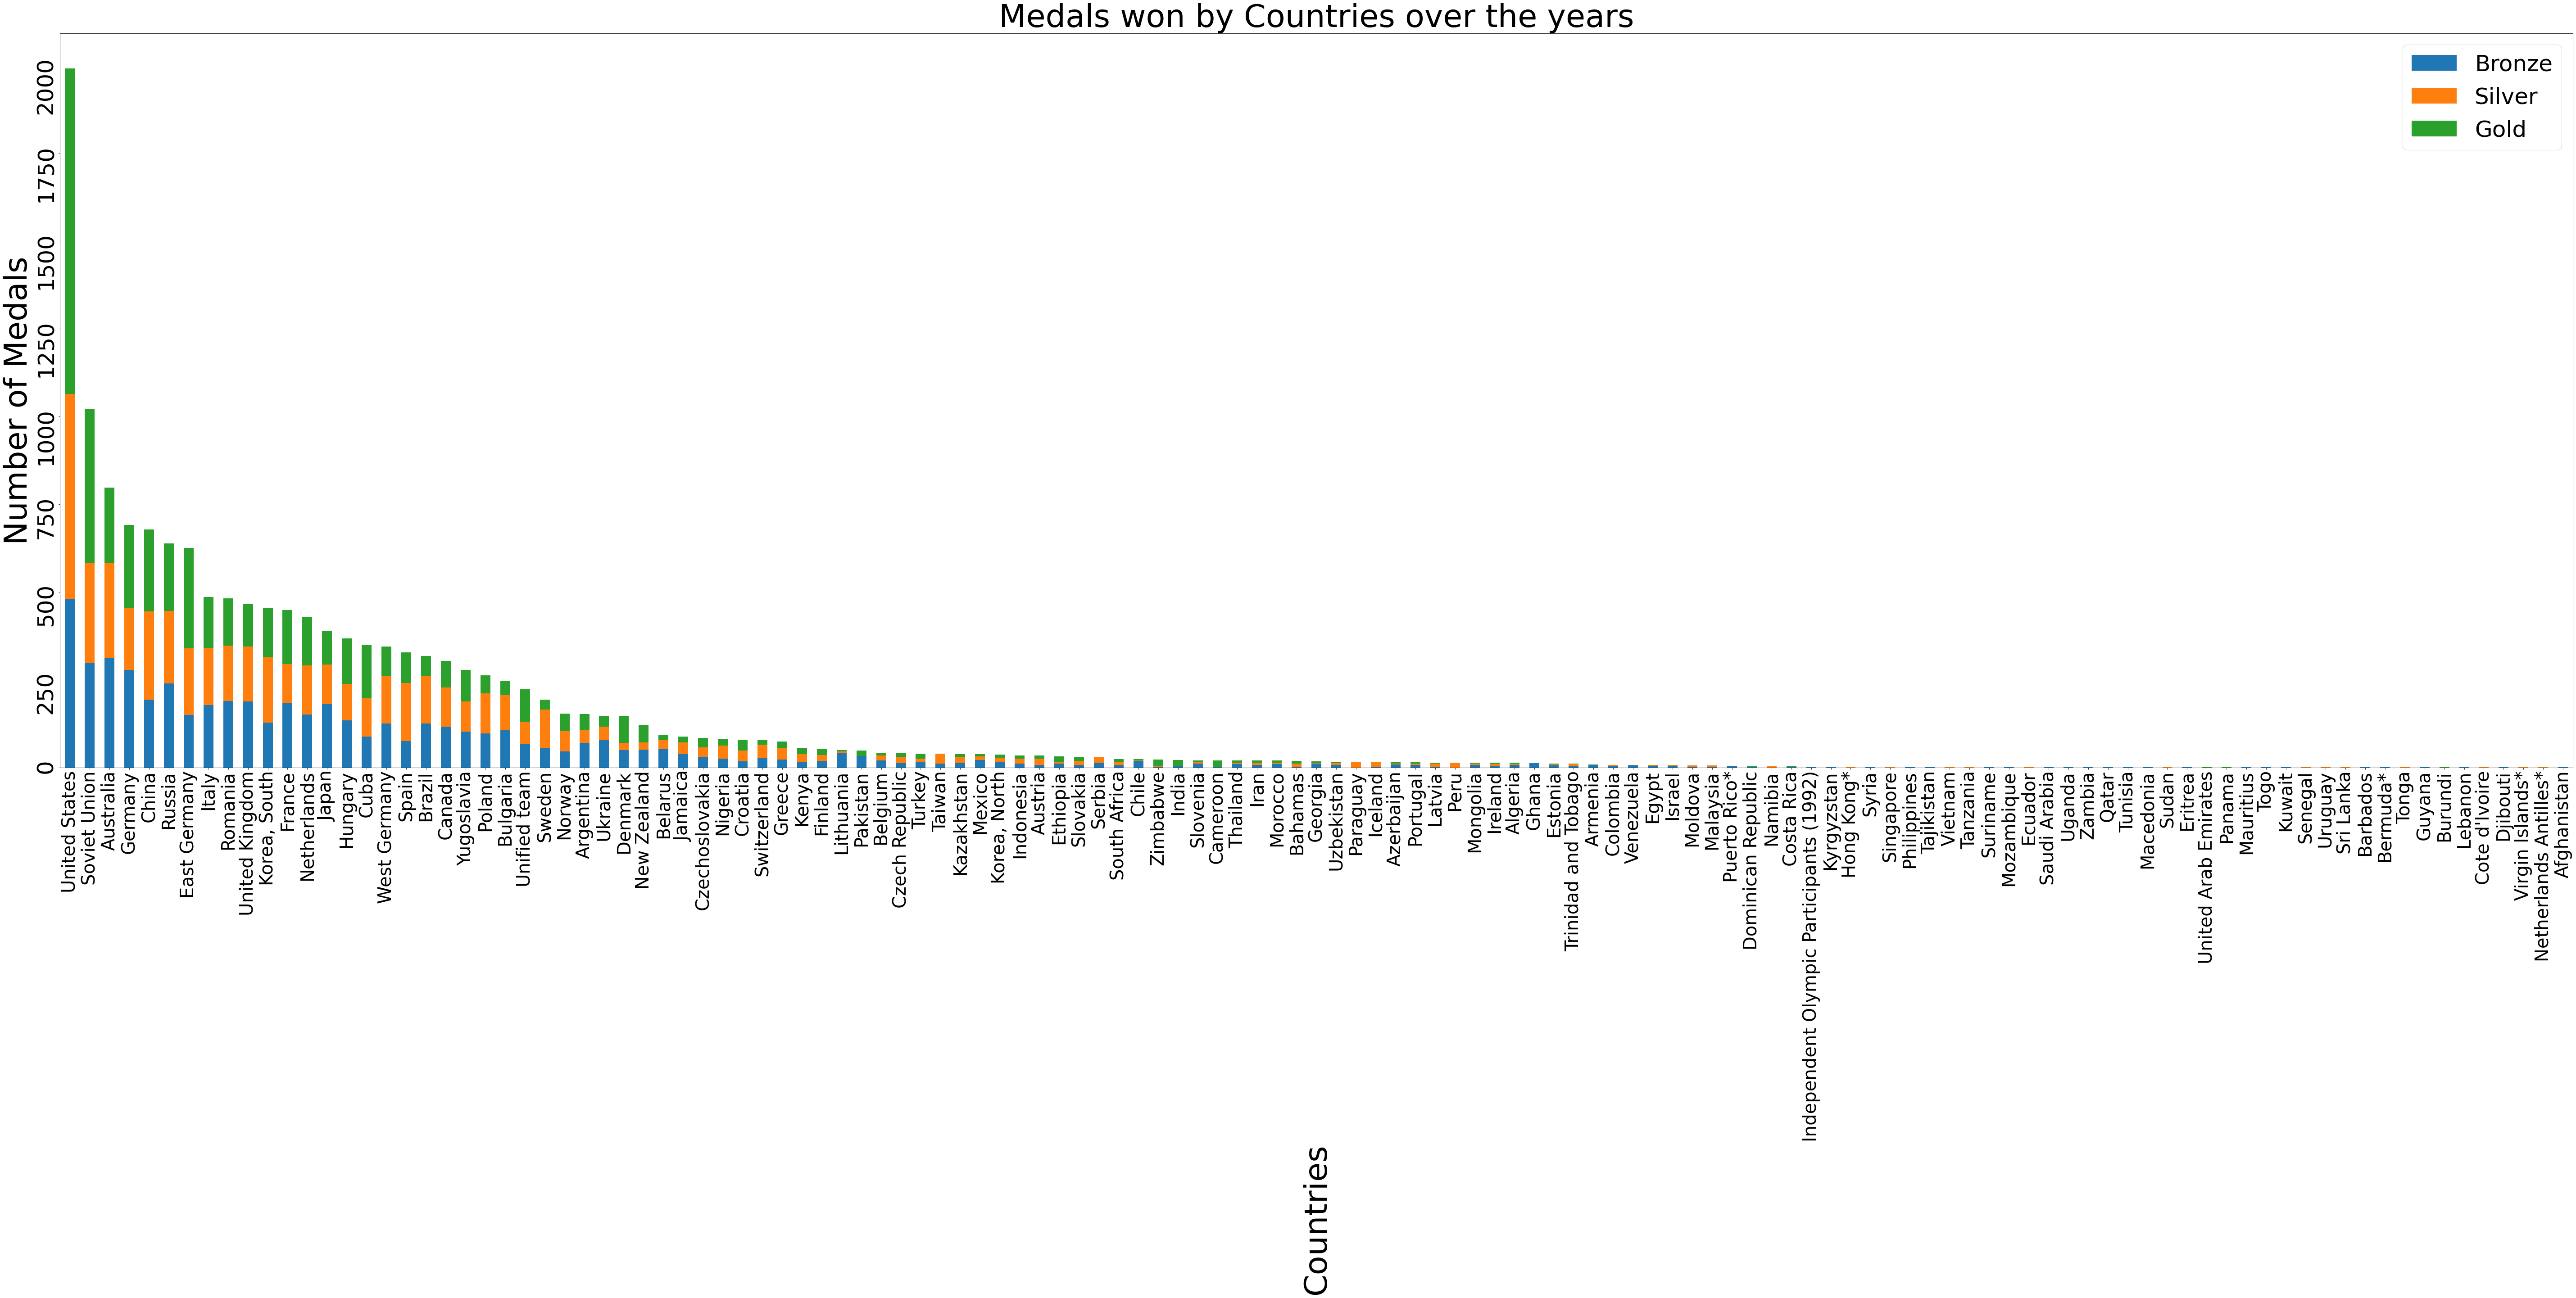

<Figure size 432x288 with 0 Axes>

In [37]:
import numpy as np
import matplotlib.pyplot as plt

new_df.plot(x='Country', kind='bar', stacked=True,figsize=(100,30))
plt.xlabel("Countries", size = 70,rotation = 90)
plt.ylabel("Number of Medals", size = 70)
plt.title("Medals won by Countries over the years", size = 70)
plt.xticks(size=40,rotation = 90)
plt.yticks(size=50, rotation = 90)
plt.legend(loc=1, prop={'size': 50})
plt.show()
plt.savefig("Country_and_Medals.png")

In [38]:
# Top 3 countries with Gold Medals

In [39]:
new_df
gold_df=new_df.sort_values(by="Gold", ascending= False)
file_2 = open("Countries by Gold.txt", 'w')
file_2.write(gold_df.to_string())
file_2.close()

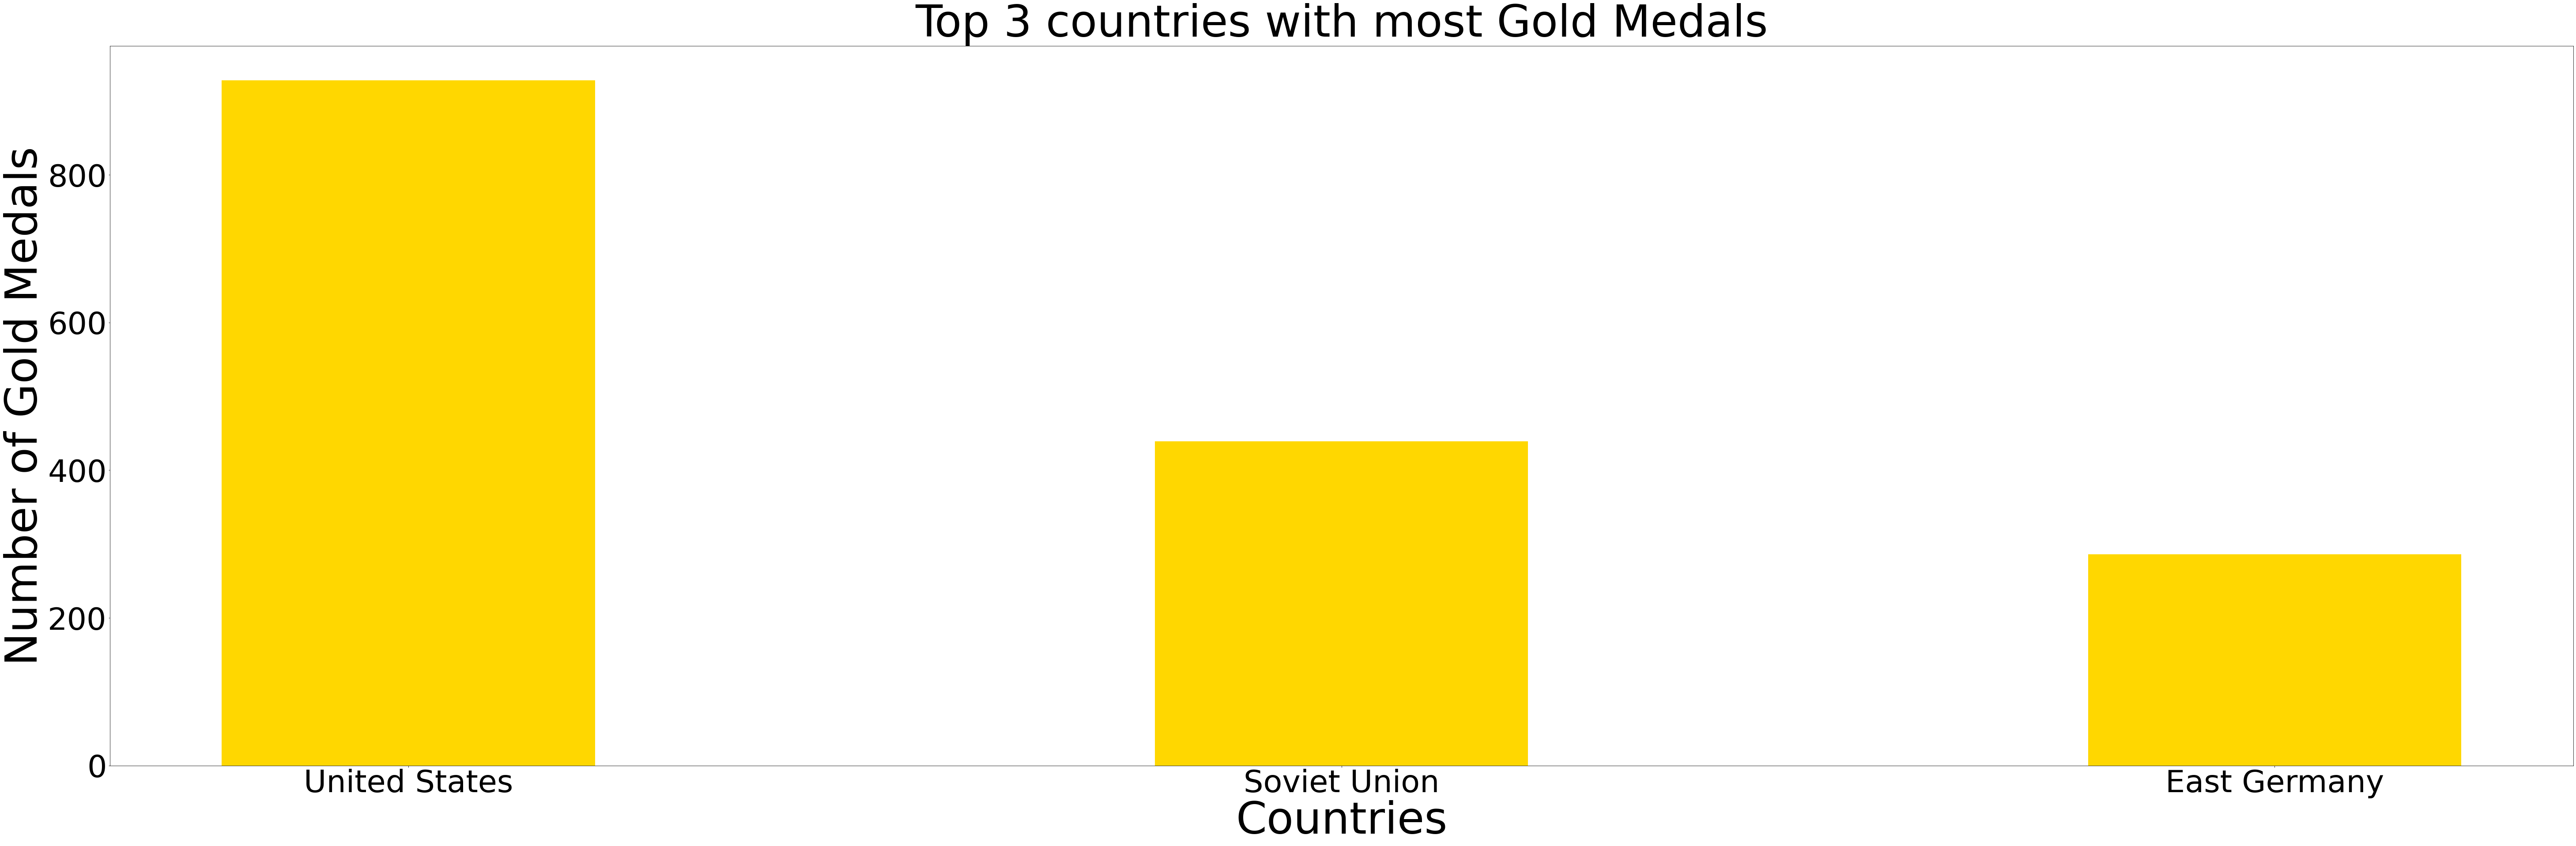

<Figure size 432x288 with 0 Axes>

In [40]:
plt.figure(figsize=(100, 30))
plt.bar(gold_df.Country[[2, 1, 0]], gold_df.Gold[[2, 1, 0]], color ='gold',
        width = 0.4)
plt.xlabel("Countries", size=100)
plt.ylabel("Number of Gold Medals", size=100)
plt.title("Top 3 countries with most Gold Medals", size=100)
plt.xticks(size=70,rotation = 0)
plt.yticks(size=70)

plt.show()
plt.savefig("Top 3 Countries by Gold.png")

In [41]:
# Top 100 Athletes on the basis of number of medals won

In [42]:
loa= df.Athlete.unique()
loav = df.Athlete.value_counts()
loav = pd.DataFrame(loav)
loav = loav.rename(columns= { "Athlete": "Number of Medals"})
loav_index= loav.index
file_3 = open("Athlete.txt", 'w')
file_3.write(loav.to_string())
file_3.close()

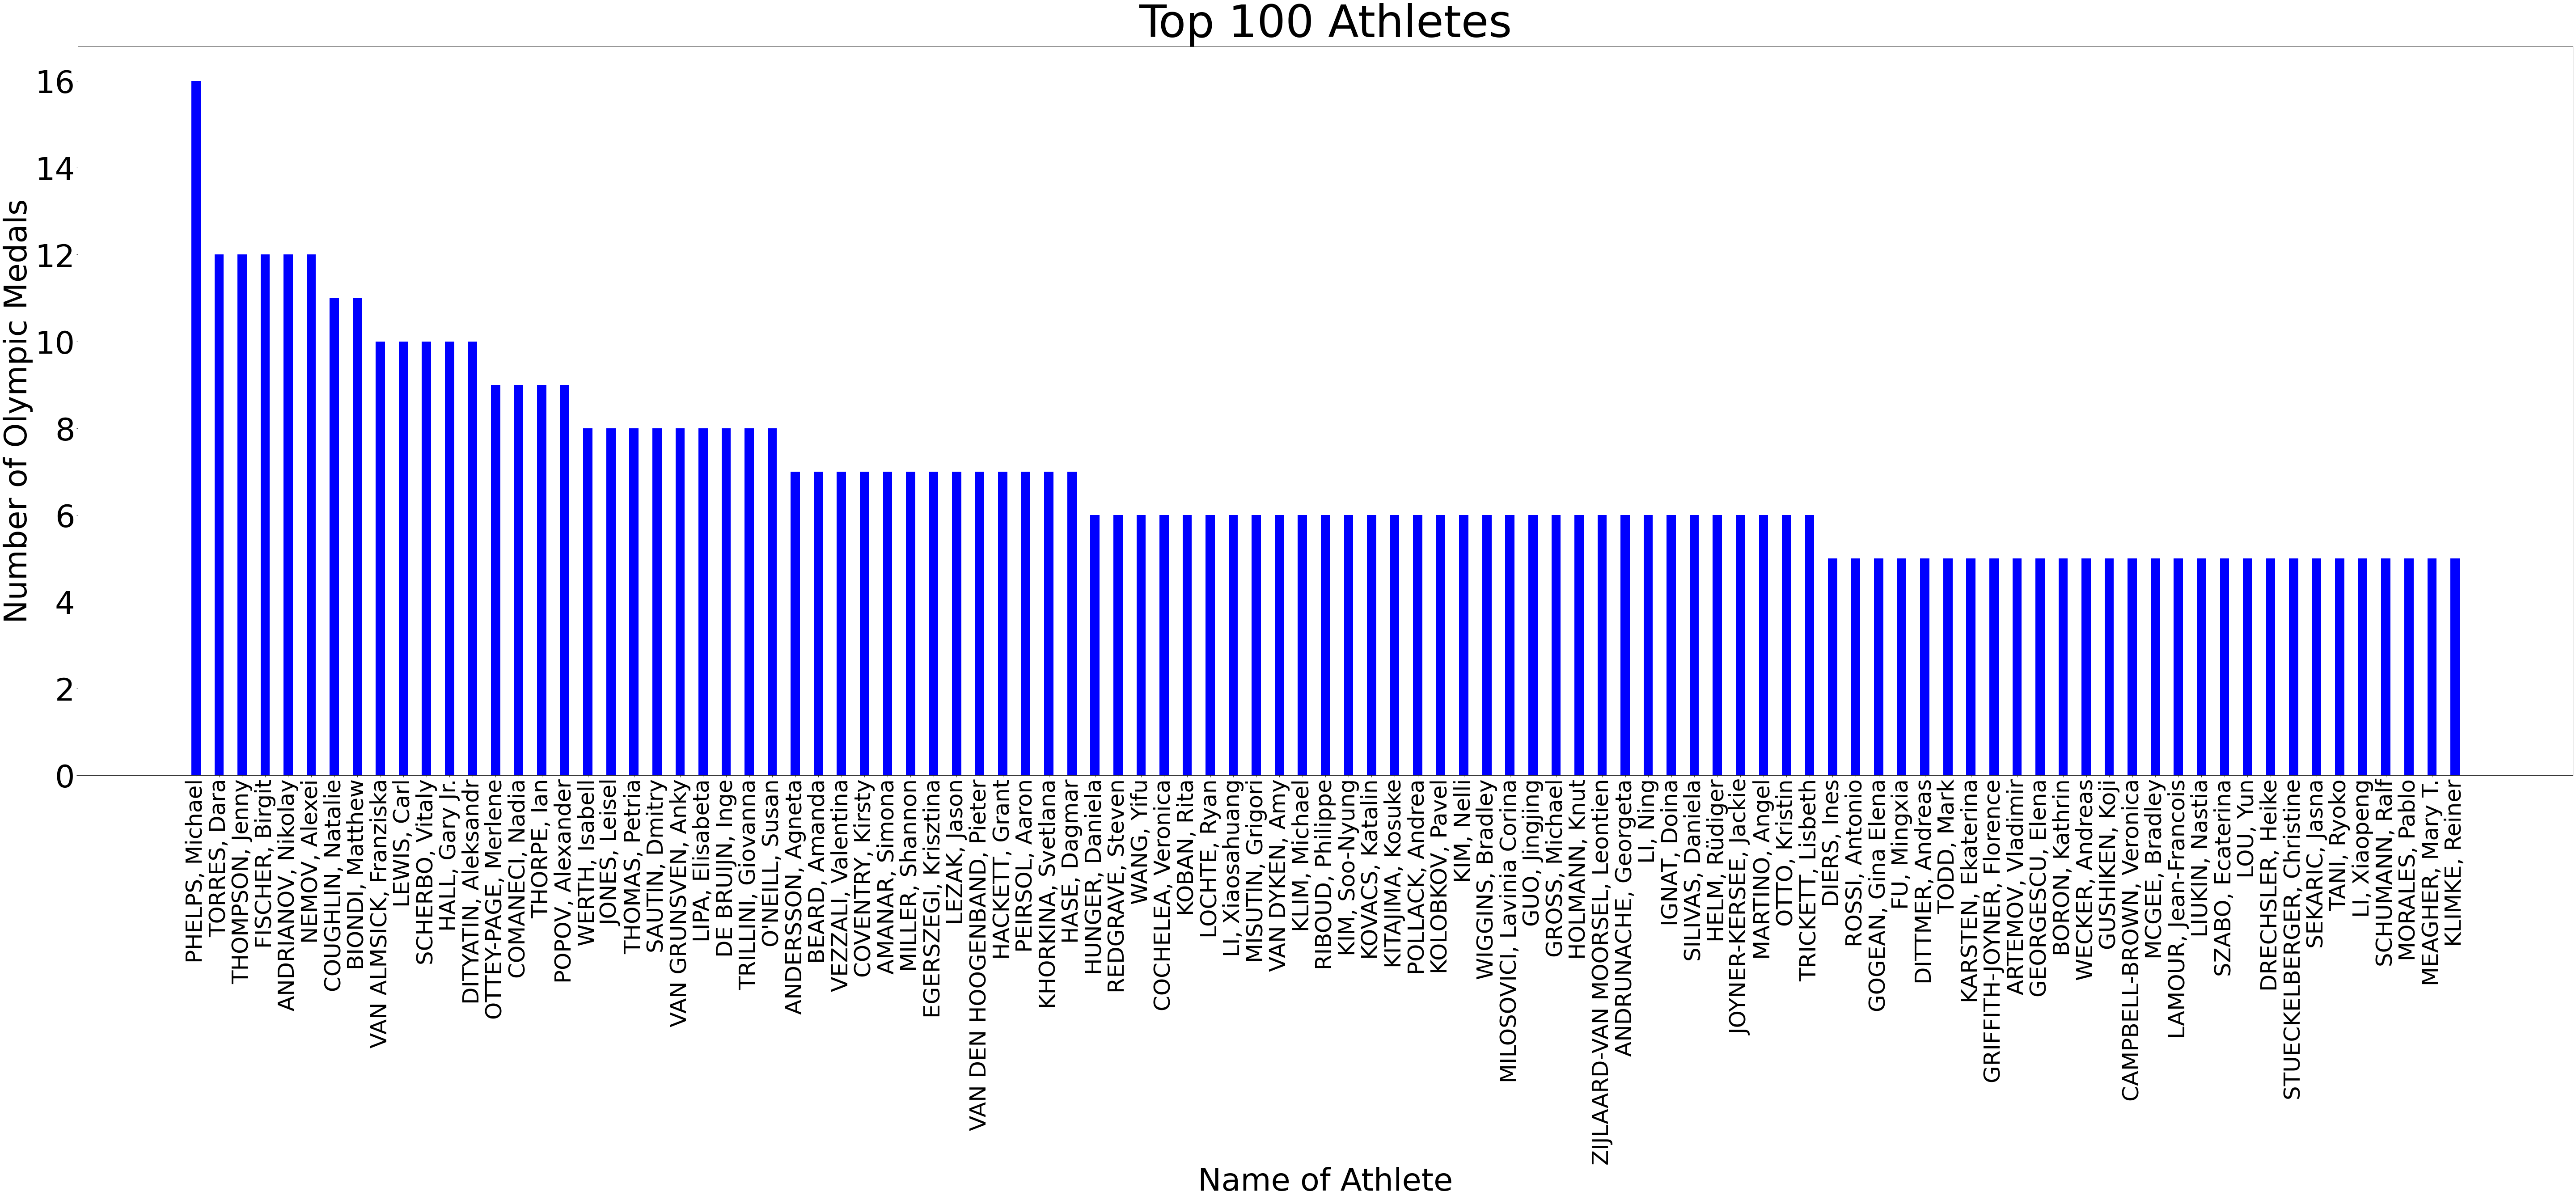

<Figure size 432x288 with 0 Axes>

In [43]:
plt.figure(figsize=(100, 30))
plt.bar(loav_index[0:99], loav["Number of Medals"][0:99], color ='blue',
        width = 0.4)
plt.xlabel("Name of Athlete", size= 70)
plt.ylabel("Number of Olympic Medals", size=70)
plt.title("Top 100 Athletes", size= 100)
plt.xticks(size=50,rotation = 90)
plt.yticks(size=70)


plt.show()
plt.savefig("Top 100 Athletes.png")

In [44]:
# Distribution of medals won by Top Athletes using Stacked Bar Graphs

In [45]:
top100= loav.index[0:100]

In [46]:
br = []
s = []
g = []

for i in top100:
    a=0
    b=0
    c=0
    for j in range(0, 15433):
        if df.Bronze[j] == 1 and df.Athlete[j] == i:
            a = a+1
        if df.Silver[j] == 1 and df.Athlete[j] == i:
            b = b+1
        if df.Gold[j] == 1 and df.Athlete[j] == i:
            c = c+1
    br.append(a)
    s.append(b)
    g.append(c)

In [47]:
from operator import add
res_list_2 = list(map(add, br, s))
res_2 = list(map(add, res_list_2, g))
dict = {'Athlete': top100, 'Bronze': br, 'Silver': s, 'Gold': g, 'Sum': res_2} 
ath_df = pd.DataFrame(dict)

ath_df = ath_df.sort_values(by = 'Sum', ascending= False)
ath_df.drop("Sum", axis=1, inplace=True)
file_4 = open("Top 100 Athletes with medal separation.txt", 'w')
file_4.write(ath_df.to_string())
file_4.close()

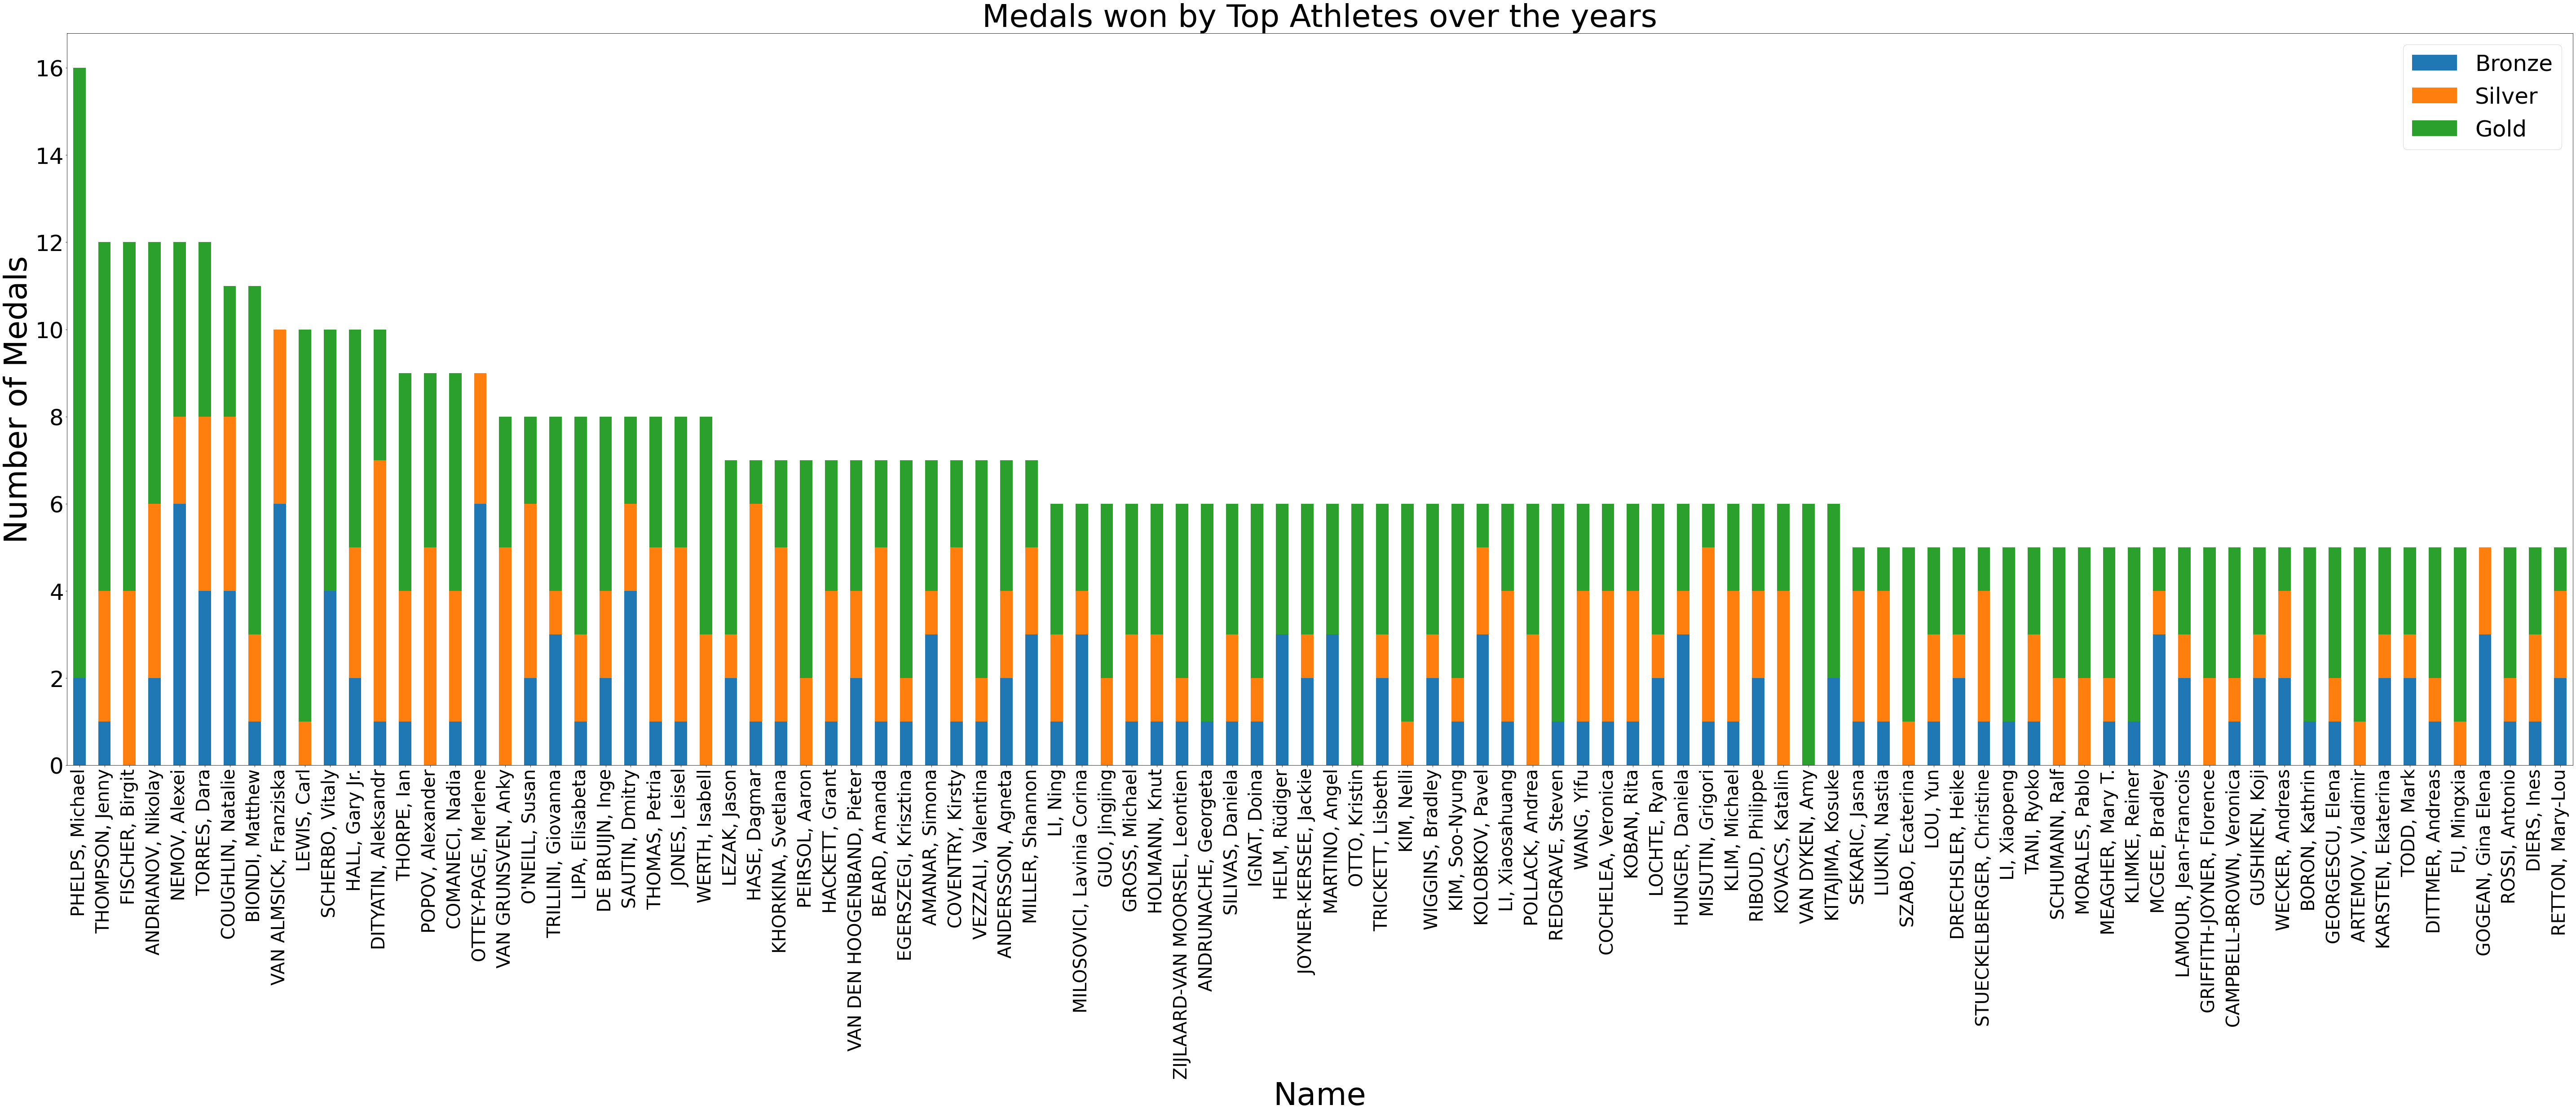

<Figure size 432x288 with 0 Axes>

In [48]:
import numpy as np
import matplotlib.pyplot as plt

ath_df.plot(x='Athlete', kind='bar', stacked=True,figsize=(100,30))
plt.xlabel("Name", size = 70)
plt.ylabel("Number of Medals", size = 70)
plt.title("Medals won by Top Athletes over the years", size = 70)
plt.xticks(size=40,rotation = 90)
plt.yticks(size=50)
plt.legend(loc=1, prop={'size': 50})
plt.show()
plt.savefig("Top Athletes Stacked.pdf")